<h1>WorkCamp # Maschinelles Lernen - ## Grundlagen - ###2018</h1>

<h2>Praktische Übung</h2>

<h3>Beispiel xx # Arbeiten mit Sensordaten ## Supervised Learning ### Classification</h3>

Problemstellung:<br>
Wie arbeitet man ein prädiktives Modellierungsproblem durchgängig in Python ab? <br>
In diesem Jupyter Notebook , werden Sie in einer Fallstudie die Problemstellung der prädiktiven Modellierung in Python durcharbeiten, die jeden Schritt des Angewandten Maschinellen Lernprozesses beinhaltet. <br>
Nach Abschluss dieses Projekts sollten Sie wissen:
<ul>
<li>Wie man ein Vorhersagemodellierungsproblem auf Basis einer Fragestelluung zur Classiﬁcation durchgehend abarbeitet.
<li>Wie man bisher unbekannte Daten in panda DataFrames lädt: (csv, xlsx, xls, xml, json, hdf5 etc.).
<li>Wie man unbekannte Daten mit einer deskriptiven Statistik in python analysiert.
<li>Wie man unbekannte Daten mit python Bibliotheken visualisiert.
<li>Wie man erzeugte Plots, speichert und dokumentiert.
<li>Wie man Datentransformationen verwendet, um die Performance des Modells zu verbessern, zum Beispiel Normalisierung oder Standardisierung.
<li>Wie man Algorithmus-, oder Hyperparameter-Tuning verwendet, um die Modell-Leistung zu verbessern.
<li>Wie man Ensemble-Methoden verwendet und eine Abstimmung der Parameter zur Verbesserung der Modell-Performance durchführt.
<li>Wie man die Kreuz-Validierung zur Beurteilung der Performance von ML-Algorithmen einsetzt.
<li> Auf welcher Basis eine Beurteilung der verwendetn Classification Algorithmen stattfindet. (Classification Matrix, Confusion Matrix)
</ul>
Die Module und Bibliotheken stehen alle in der <b>Anaconda scikit-learn</b> Umgebung zum Maschinellen Lernen direkt zur Verfügung.<br>
<b>Arbeiten mit Zeitreihen:</b><br>
Insbesondere beim arbeiten mit Zeitreihen (timeseries) wird, falls notwendig, statsmodels und dessen Klassen, Bibliotheken und Module nachgeladen.<br>
<b>Tipp:</b><br>
<b>Falls in Ihrer Version statsmodels nicht vorhanden ist, mit: !pip install statsmodels in einer Jupyter Zelle
nachinstallieren.</b><br>
Informationen zu statsmodels finden Sie hier: http://www.statsmodels.org/<br>

########Eventuell Strukturbild einbauen ########

########Evtl. nochmals Vorgehen als Ablaufmodell#########

In [47]:
# Laden der entsprechenden Module
# Wie laden die Module offen, damit man einmal sieht, was da alles benötigt wird
# Allerdings aufpassen, dann werden die Module anderst angesprochen wie beim Standard
# zum Beispiel pyplot und nicht plt
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = (15,12)
%matplotlib inline
import numpy as np #wird allerdings nicht benötigt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

Problem Beschreibung:<br>
Der Fokus dieses Projektes liegt auf dem Datensatz "sensordaten-10.csv". Das Problem ist die Vorhersage von guten und schlechten Werkstücken aus den 10 Sensordaten. Jedes Muster ist ein Satz von 10 Zahlen. Die Sensoren decken unterschiedliche Wertebereiche ab.Das Label, das jeder Datenreihe zugeordnet ist, enthält 0 oder 1. Wenn das Werkstück die Beurteilung gut hat steht eine 1 in der Spalte Label, sonst eine 0.<br>
<b>Aufgabe:</b><br>
Laden Sie die Daten und führen Sie eine Statistische Analyse durch. Beschreiben Sie die Daten und visualisieren sich diese Daten um einen besseren Einblick zu bekommen.


In [48]:
#Laden der Daten [12100 Datensätze mit 10 Sensoren und einer Spalte Label (12100x11)Matrix]
url = 'sensordaten-10.csv'
dataset = read_csv(url, sep=';', header=0)

<h3>Beschreibende Statistik</h3>

In [49]:
# Ausgabe df.shape
print(dataset.shape)

(12100, 11)


In [50]:
# Ausgabe df.dtypes
# Spalte enthält die Classifikation R oder M
set_option('display.max_rows', 50)
print(dataset.dtypes)

Sens-1     float64
Sens-2     float64
Sens-3     float64
Sens-4     float64
Sens-5     float64
Sens-6     float64
Sens-7     float64
Sens-8     float64
Sens-9     float64
Sens-10    float64
Label        int64
dtype: object


In [51]:
# Ausgabe df.head mit vergösserter display width
set_option('display.width', 100)
print(dataset.head(20))

    Sens-1  Sens-2  Sens-3  Sens-4  Sens-5  Sens-6  Sens-7  Sens-8  Sens-9  Sens-10  Label
0    15.31   25.31   75.31  109.23   63.07    0.65  159.60   23.69   41.53    59.21      1
1    16.76   26.76   76.76  115.05   77.62    1.38  181.44   47.48   77.22   118.70      1
2    18.62   28.62   78.62  122.48   96.20    2.31  209.29   46.78   76.16   116.94      1
3    18.52   28.52   78.52  122.08   95.21    2.26  207.82   41.68   68.52   104.20      1
4    18.93   28.93   78.93  123.74   99.34    2.47  214.01   34.61   57.92    86.54      1
5    17.28   27.28   77.28  117.12   82.81    1.64  189.21   46.71   76.07   116.78      1
6    18.09   28.09   78.09  120.35   90.88    2.04  201.31   42.68   70.02   106.71      1
7    19.00   29.00   79.00  124.00  100.00    2.50  215.00   31.19   52.78    77.96      1
8    17.78   27.78   77.78  119.11   87.79    1.89  196.68   43.80   71.71   109.51      0
9    17.83   27.83   77.83  119.31   88.27    1.91  197.40   47.71   77.57   119.28      1

In [52]:
# Ausgabe df.describe() mit 4 Nachkomma Stellen
set_option('precision', 4)
print(dataset.describe())

           Sens-1      Sens-2      Sens-3      Sens-4      Sens-5      Sens-6      Sens-7  \
count  12100.0000  12100.0000  12100.0000  12100.0000  12100.0000  12100.0000  12100.0000   
mean      18.0005     28.0005     78.0005    120.0021     90.0052      2.0006    200.0078   
std        1.0067      1.0067      1.0067      4.0267     10.0667      0.5028     15.1000   
min       13.9900     23.9900     73.9900    103.9600     49.9100      0.1300    139.8600   
25%       17.3100     27.3100     77.3100    117.2400     83.1100      1.6600    189.6600   
50%       18.0000     28.0000     78.0000    119.9900     89.9800      2.0000    199.9650   
75%       18.6700     28.6700     78.6700    122.6800     96.7100      2.3400    210.0600   
max       21.7400     31.7400     81.7400    134.9700    127.4200      3.8700    256.1200   

           Sens-8      Sens-9     Sens-10       Label  
count  12100.0000  12100.0000  12100.0000  12100.0000  
mean      44.0383     72.0574    110.0942      0.9

In [53]:
# Ausgabe der Klassen Verteilung in der Spalte 60
print(dataset.groupby('Label').size())


Label
0      932
1    11168
dtype: int64


<h3>Visualisierung der Daten</h3>

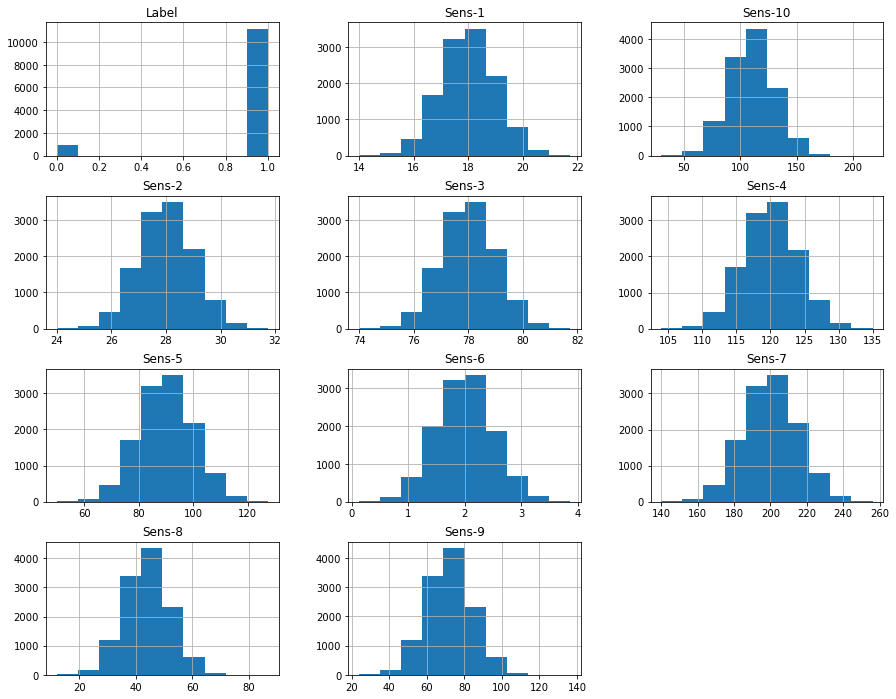

In [57]:
# Ausgabe Histogramm
pyplot.rcParams["figure.figsize"] = (15,12)
dataset.hist()
pyplot.show()

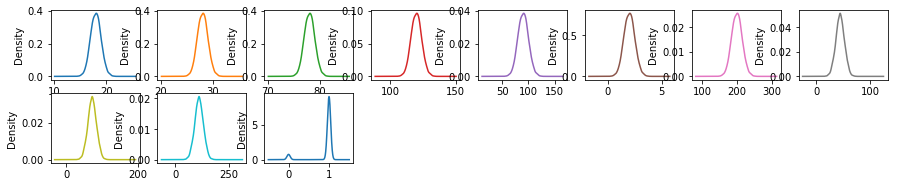

In [58]:
# Ausgabe der Dichtefunktion
pyplot.rcParams["figure.figsize"] = (15,12)
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
pyplot.show()

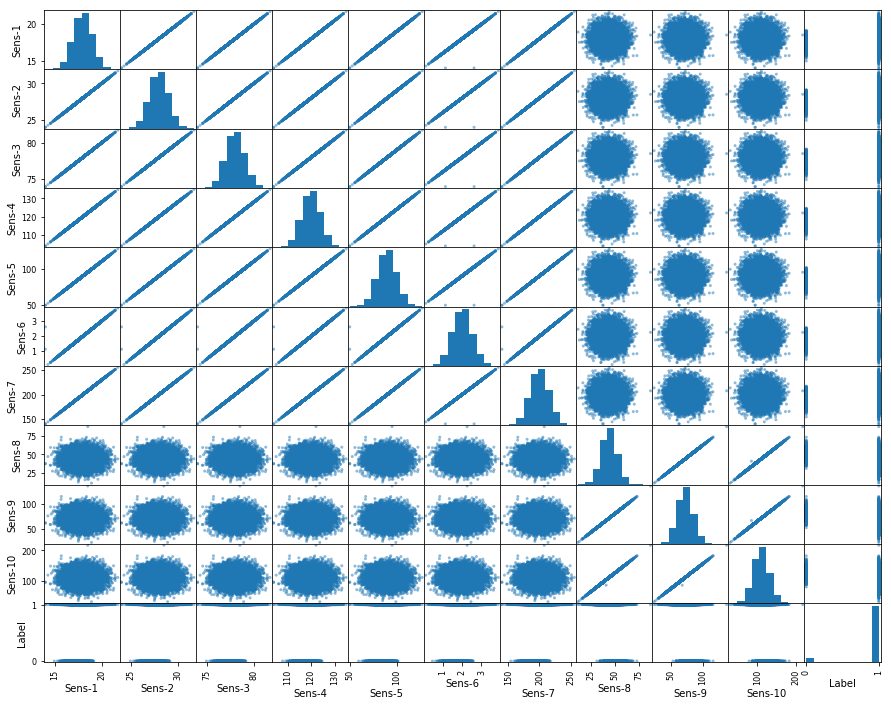

In [59]:
# Ausgabe scatter plot matrix
pyplot.rcParams["figure.figsize"] = (15,12)
scatter_matrix(dataset)
pyplot.show()

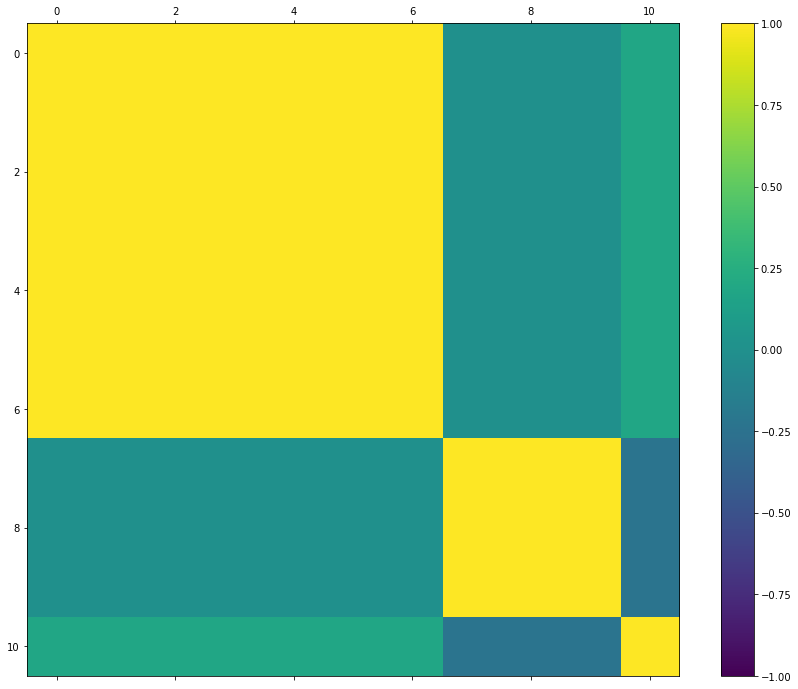

In [60]:
# Ausgabe correlation matrix
fig = pyplot.figure()
pyplot.rcParams["figure.figsize"] = (15,12)
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

<h3>Vorbereiten der Daten: Aufteilen in Test und Trainingsdaten </h3>

In [61]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:10].astype(float)
Y = array[:,10]
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [62]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.922078 (0.009191)
LDA: 0.922904 (0.008946)
KNN: 0.918300 (0.009661)
CART: 0.878512 (0.007678)
NB: 0.776151 (0.010694)
SVM: 0.926210 (0.008485)


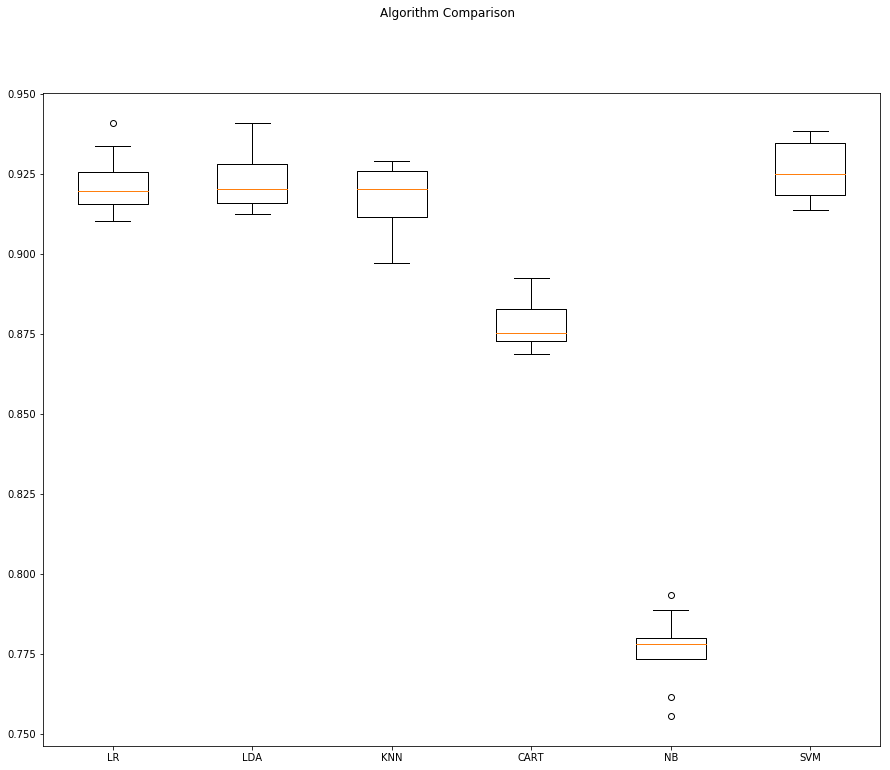

In [64]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [66]:
# Daten standardisieren
# Erstellen einer Lise fuer die Pipelines
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.922078 (0.009191)
ScaledLDA: 0.922904 (0.008946)
ScaledKNN: 0.917119 (0.009398)
ScaledCART: 0.880992 (0.009035)
ScaledNB: 0.776151 (0.010694)
ScaledSVM: 0.923849 (0.008583)


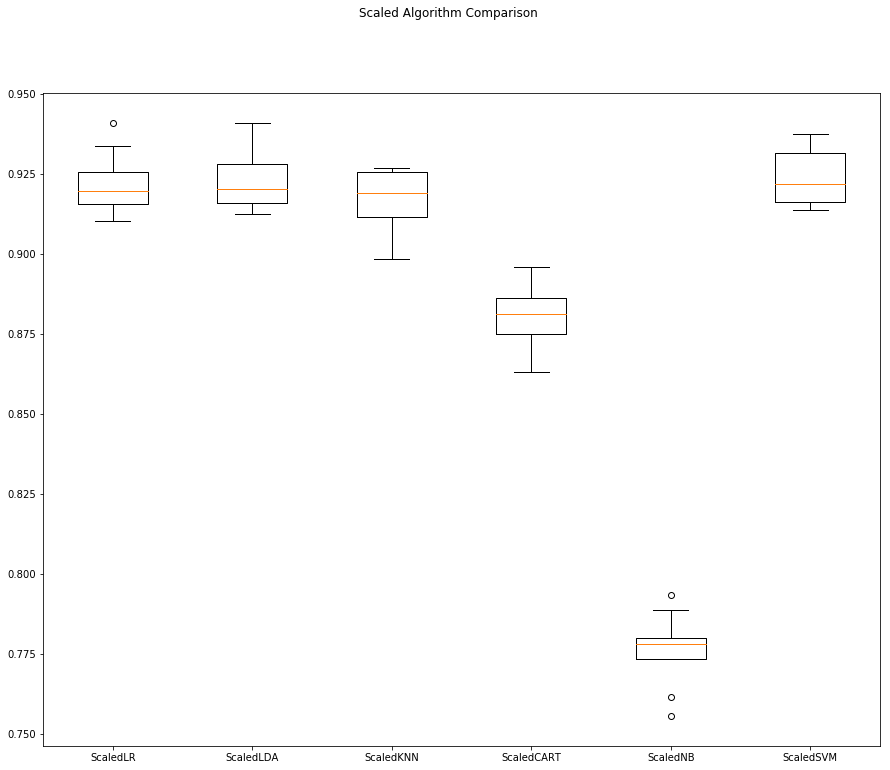

In [67]:
# Vergleich der Algorithmen
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Im Ergebnis sind also K-NN und SCM die Algorithmen<br>
die bessere Ergebnisse liefern<br>
In die weiteren Betrachtungen und Optimierungen werden nur<br>
noch diese Algorithmen einbezogen.<br>

In [69]:
# Tuning K-NN mit skalierten Daten - Die Anzahl der Nachbarn wird variiert
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
#neighbors = [1,3,5,7,9,11,13,15,17,19,21]
neighbors = [21,22,23]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.926564 using {'n_neighbors': 21}
0.926564 (0.009530) with: {'n_neighbors': 21}
0.924675 (0.010071) with: {'n_neighbors': 22}
0.925384 (0.009248) with: {'n_neighbors': 23}


In [70]:
# Tuning der SVM mit skalierten Daten über ein param_grid
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
#c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
c_values = [1.5, 1.7, 2.0]
#kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_values = ['rbf']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.924085 using {'kernel': 'rbf', 'C': 1.7}
0.923967 (0.008598) with: {'kernel': 'rbf', 'C': 1.5}
0.924085 (0.008612) with: {'kernel': 'rbf', 'C': 1.7}
0.923849 (0.008550) with: {'kernel': 'rbf', 'C': 2.0}


In [71]:
# Aufbauen von Ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.923495 (0.008848)
GBM: 0.923613 (0.008741)
RF: 0.902834 (0.011831)
ET: 0.896104 (0.010320)


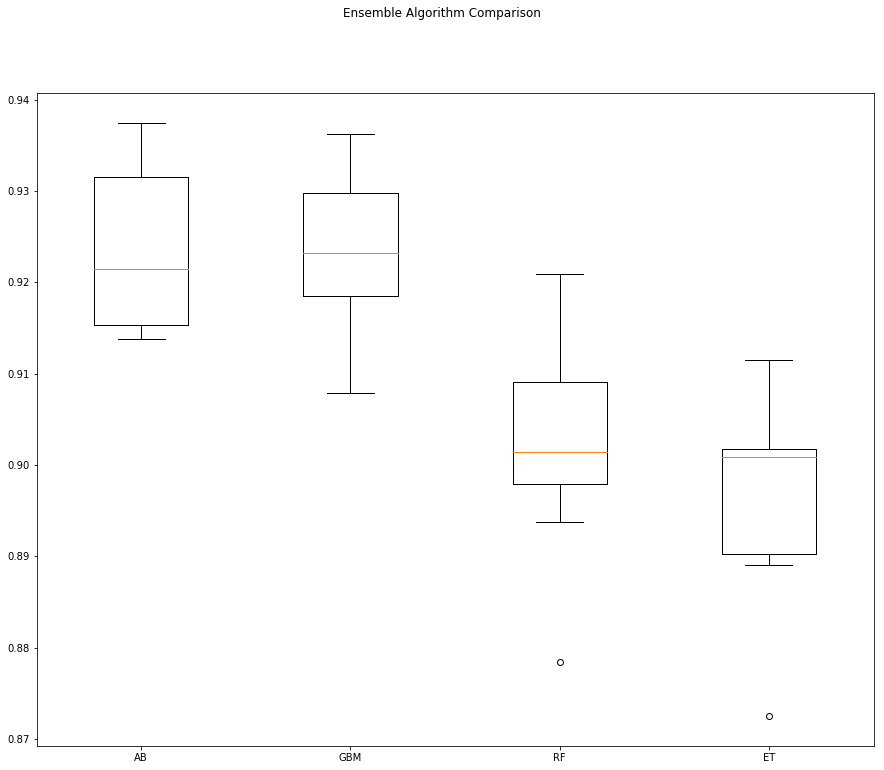

In [72]:
# Vergleich der Algorithmen
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [73]:
# Überprüfen des ausgewählten Modells,SVM (Support Vektor Machine), auf den Validierungsdaten

# Vorbereiten des Modells
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
#Validierung des SVM Modells
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# Abschätzung der accuracy auf den Validierungs Daten
rescaledValidationX = scaler.transform(X_validation)
# Durchführen der Vorhersagen auf den Validierungsdaten
predictions = model.predict(rescaledValidationX)
# Ausgabe accuracy
print(accuracy_score(Y_validation, predictions))
# Ausgabe Confusion Matrix
print(confusion_matrix(Y_validation, predictions))
# Ausgabe classification_report
print(classification_report(Y_validation, predictions))

0.921487603306
[[   1  285]
 [   0 3344]]
             precision    recall  f1-score   support

        0.0       1.00      0.00      0.01       286
        1.0       0.92      1.00      0.96      3344

avg / total       0.93      0.92      0.88      3630



In [74]:
# Überprüfen des ausgewählten Modells,K-NN (K-Nearest Neighbors), auf den Validierungsdaten

# Vorbereiten des Modells
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
#Validierung des K-NN Modells
model = KNeighborsClassifier(n_neighbors=21)
model.fit(rescaledX, Y_train)
# Abschätzung der accuracy auf den Validierungs Daten
rescaledValidationX = scaler.transform(X_validation)
# Durchführen der Vorhersagen auf den Validierungsdaten
predictions = model.predict(rescaledValidationX)
# Ausgabe accuracy
print(accuracy_score(Y_validation, predictions))
# Ausgabe Confusion Matrix
print(confusion_matrix(Y_validation, predictions))
# Ausgabe classification_report
print(classification_report(Y_validation, predictions))

0.920385674931
[[  20  266]
 [  23 3321]]
             precision    recall  f1-score   support

        0.0       0.47      0.07      0.12       286
        1.0       0.93      0.99      0.96      3344

avg / total       0.89      0.92      0.89      3630



<h2>Weiterführende Links:</h2>

<ul>
<li> https://www.stuttgart.ihk.de
</ul>

<h2>Weiterführende Literatur:</h2>

<ul>
<li> https://www.stuttgart.ihk.de
</ul>

<b>Ansprechpartner IHK-Region Stuttgart:</b><br>
Dipl. Wirtsch-Ing. R. Rank